### Section I: Import the data

In [1]:
%matplotlib inline 

import pandas as pd
import seaborn as sb

In [2]:
mtcars = pd.read_csv("../../assets/datasets/mtcars.csv")
mtcars.head()

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Plot the Data

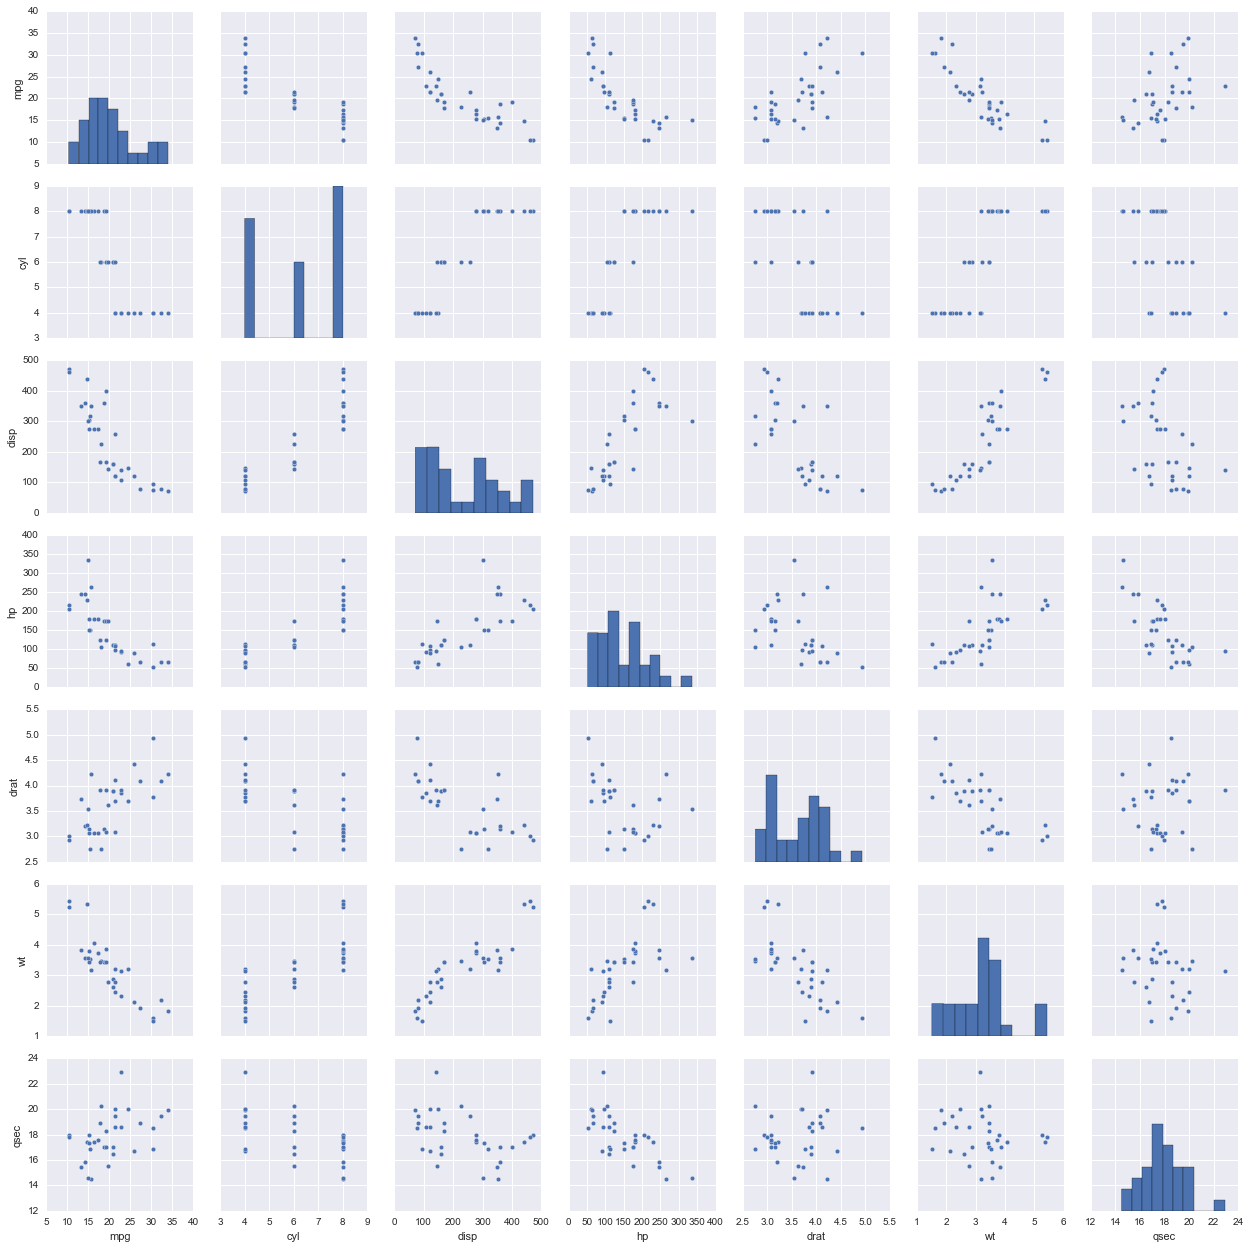

In [16]:
sb.pairplot(mtcars[['mpg','cyl','disp','hp','drat','wt','qsec']])

### Extract the features you to use in clustering into a matrix

In [18]:
features = mtcars.drop(labels='Car',axis=1)

### Cluster the data using K-Means Clustering

Cluster two of the variables of your choice. Choose K based on your plots and the behavior of the data

In [22]:
from sklearn.cluster import KMeans
n_clusters=3
km = KMeans(n_clusters,random_state=1)
km.fit(features[['mpg','disp']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [24]:
km.cluster_centers_

array([[  16.7625 ,  279.175  ],
       [  14.6    ,  399.125  ],
       [  24.5    ,  122.29375]])

In [25]:
km.labels_

array([2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0,
       1, 1, 2, 2, 2, 1, 2, 0, 2])

### Find the Silhoutte Score and plot the features and clusters

Silhouette measures how similar an observation is to its own cluster compared to the closest cluster

In [27]:
from sklearn.metrics import silhouette_score
silhouette_score(features[['mpg','disp']],km.labels_)

0.6409128610788557

In [31]:
df = pd.concat([features[['mpg','disp']],pd.Series(km.labels_,name='label')],axis=1)

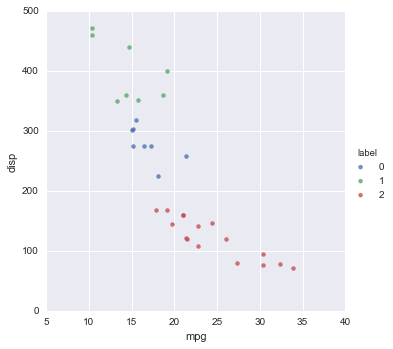

In [35]:
sb.lmplot('mpg','disp',df,hue='label',fit_reg=False)